#  Titanic - Machine Learning Project

This project is inspired by the competition [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) from Kaggle.

> The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

# Project Overview

1. [Exploratory Data Analysis](#1.-Exploratory-Data-Analysis)
2. [Feature Engineering](#2.-Feature-Engineering)
3. [Data Preprocessing](#3.-Data-Preprocessing)
4. [Model Building](#4.-Model-Building)
5. [Model Tuning](#5.-Model-Tuning)
6. [Model Evaluation](#6.-Model-Evaluation)
6. [Model Results](#7.-Model-Results)

# 1. Exploratory Data Analysis

In this step, an overview of the dataset will be performed, followed by a column-by-column analysis.

## 1.1 Dataset overview

In [2]:
# Importing libraries

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the data set

train = pd.read_csv('train.csv')

In [4]:
# Printing the first rows of the training data set

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Printing the data dictionary

dictionary = pd.read_csv('dictionary.csv', sep = ';')

dictionary

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [6]:
# Checking null values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The 'Age', 'Embarked' and 'Cabin' columns contain some null values.

## 1.2 Column analysis

### 1.2.1 'Survived'

In [7]:
# Checking how many people survived in the training data set

survived = pd.DataFrame(train.groupby('Survived').count()['PassengerId'])
survived.columns = ['Count']
survived['Percentage'] = survived.apply(lambda x: round((x['Count'] / train.shape[0])*100,2), axis = 1)

survived

,Count,Percentage
Survived,,
0,549,61.62
1,342,38.38


61.62% of training set is Class 0 (Not survived)

38.38% of training set is Class 1 (Survived)

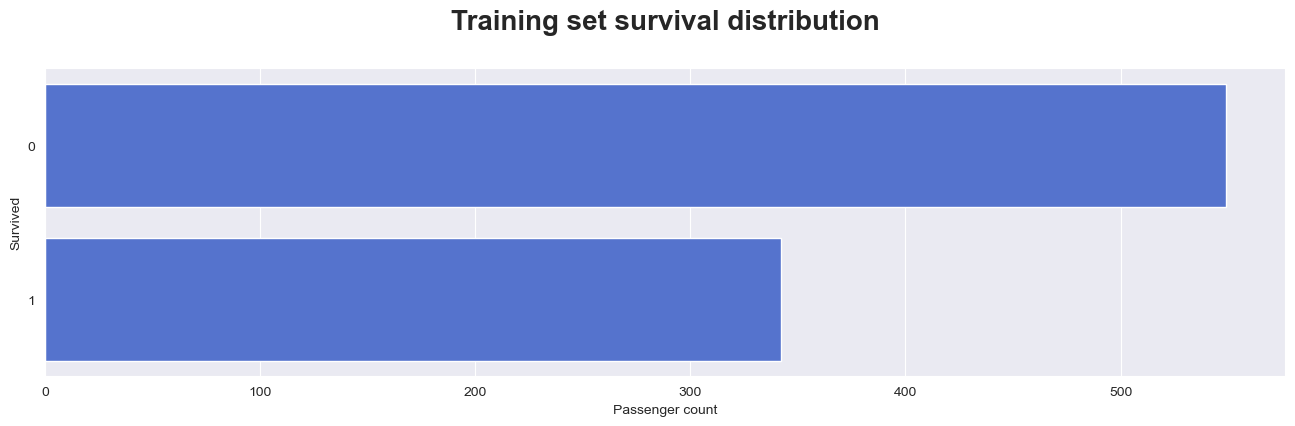

In [8]:
# Viewing training set survival distribution 

sns.set_style('darkgrid')

plt.figure(figsize=(16,4))

ax = sns.barplot(x = survived['Count'],
                 y = survived.index,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Training set survival distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count')

ax = ax

### 1.2.2 'Pclass'

In [9]:
# Checking passenger count by ticket class in the training data set

pclass = pd.DataFrame(train.groupby(['Pclass']).count()['PassengerId'])
pclass.columns = ['Count']
pclass['Percentage'] = pclass.apply(lambda x: round((x['Count'] / train.shape[0])*100,2), axis = 1)

pclass

,Count,Percentage
Pclass,,
1,216,24.24
2,184,20.65
3,491,55.11


24.24% of training set is upper class

20.65% of training set is middle class

55.11% of training set is lower class

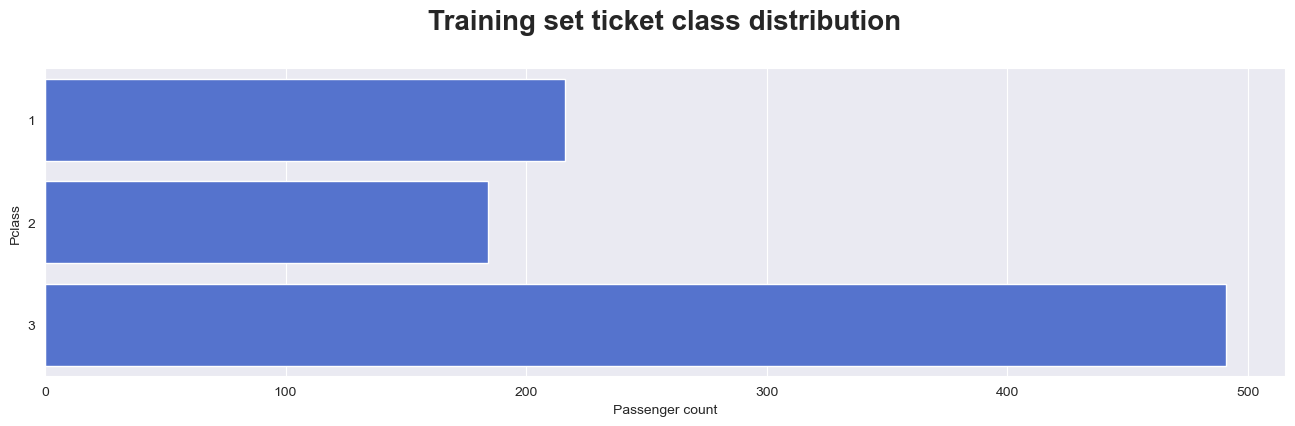

In [10]:
# Viewing training set ticket class distribution 

sns.set_style('darkgrid')

plt.figure(figsize=(16,4))

ax = sns.barplot(x = pclass['Count'],
                 y = pclass.index,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Training set ticket class distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count')

ax = ax

In [11]:
# Checking survival grouped by ticket class

pclass = pd.DataFrame(train[['Pclass', 'Survived']].groupby(['Pclass']).mean())
pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


62.92% of upper class passengers survived

47.28% of middle class passengers survived

24.23% of middle class passengers survived

Thus, there's probably a correlation between ticket class and survival. For the model building, ticket class 1 and 2 will be included.

### 1.2.3 'Name'

In [12]:
# Viewing the 5 first rows

train.Name.head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Although the full name does not provide much information for the model, titles can be important for feature engineering later.

### 1.2.4 Sex

In [13]:
# Checking passenger count by sex in the training data set

gender = pd.DataFrame(train.groupby(['Sex']).count()['PassengerId'])
gender.columns = ['Count']
gender['Percentage'] = gender.apply(lambda x: round((x['Count'] / train.shape[0])*100,2), axis = 1)

gender

,Count,Percentage
Sex,,
female,314,35.24
male,577,64.76


35.24% of training set is female

64.76% of training set is male

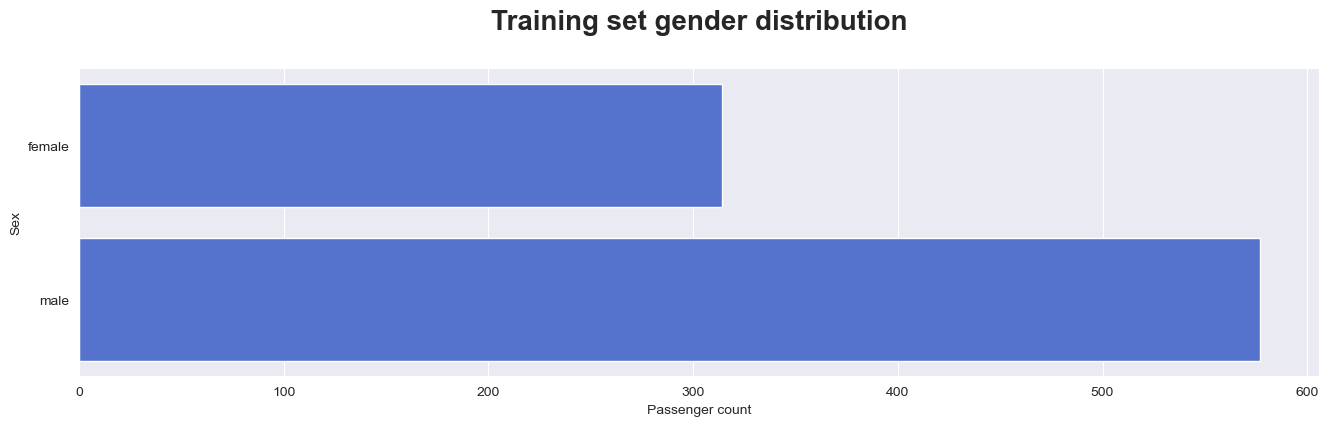

In [14]:
# Viewing training set gender distribution 

sns.set_style('darkgrid')

plt.figure(figsize=(16,4))

ax = sns.barplot(x = gender['Count'],
                 y = gender.index,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Training set gender distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count')

ax = ax

In [15]:
# Checking survival grouped by ticket class

gender = pd.DataFrame(train[['Sex', 'Survived']].groupby(['Sex']).mean())
gender

,Survived
Sex,
female,0.742038
male,0.188908


74.20% of female passengers survived

18.89% of male passengers survived

A gender dummy will be included in model building.

### 1.2.5 Age

In [16]:
# Checking age distribution in the training data set

train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
# Since there are a few missing values, null values will be replaced with the median of the column

train.Age.fillna(train.Age.median(), inplace = True)

In [18]:
# Checking age distribution in the training data set after removing null values

train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

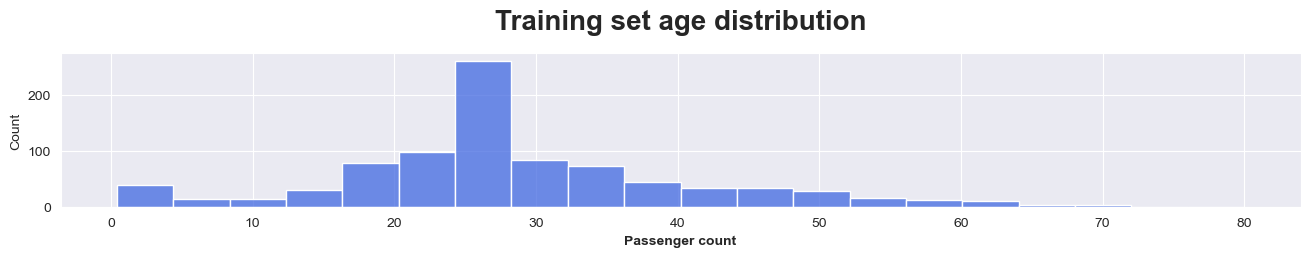

In [19]:
# Viewing training set age distribution

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.histplot(x = train['Age'],
                 color = 'royalblue',
                 bins = 20)

ax.set_title('Training set age distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count', 
              fontweight = 'bold')

ax = ax


In [20]:
# Viewing correlation between age and survival

train[['Age', 'Survived']].corr()

,Age,Survived
Age,1.00000,-0.06491
Survived,-0.06491,1.00000


There's a weak correlation between variables. Maybe it would make more sense to work with age bands.

### 1.2.6 Sibilings and Parents

In [21]:
# Checking number of sibilings distribution in the training data set

train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
# Checking number of parents distribution in the training data set

train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

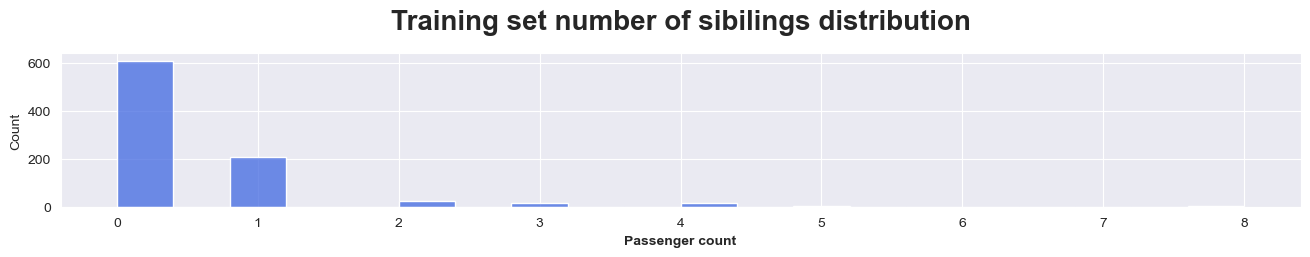

In [23]:
# Viewing training set number of sibilings distribution

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.histplot(x = train['SibSp'],
                 color = 'royalblue',
                 bins = 20)

ax.set_title('Training set number of sibilings distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count', 
              fontweight = 'bold')

ax = ax


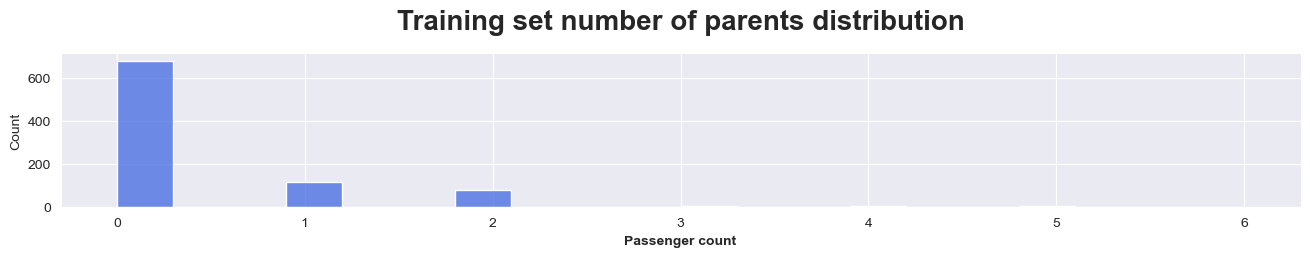

In [24]:
# Viewing training set number of parents distribution

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.histplot(x = train['Parch'],
                 color = 'royalblue',
                 bins = 20)

ax.set_title('Training set number of parents distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count', 
              fontweight = 'bold')

ax = ax


In [25]:
# Viewing correlation between number of sibilings and survival

train[['SibSp', 'Survived']].corr()

,SibSp,Survived
SibSp,1.000000,-0.035322
Survived,-0.035322,1.000000


In [26]:
# Viewing correlation between number of parents and survival

train[['Parch', 'Survived']].corr()

,Parch,Survived
Parch,1.000000,0.081629
Survived,0.081629,1.000000


There's a weak correlation between variables. By adding the number of siblings and parents, it is possible to estimate the family size of each passenger present on the ship. Maybe this would work better.

### 1.2.7 Ticket and Cabin

In [27]:
# Viewing the 10 first rows of 'Ticket' column

train.Ticket.head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [28]:
# Checking duplicates

train.Ticket.duplicated().sum()

210

In [29]:
# Viewing the 10 first rows of 'Cabin' column

train.Cabin.head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [30]:
# Checking duplicates

train.Cabin.duplicated().sum()

743

Both columns have alphanumeric data. The 'Cabin' column has more duplicate items, which could mean they shared a cabin. This can be an item to be analyzed in feature engineering

### 1.2.8 Fare

In [31]:
# Checking fare distribution in the training data set

train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
# Checking fare distribution in the training data set after removing null values

train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

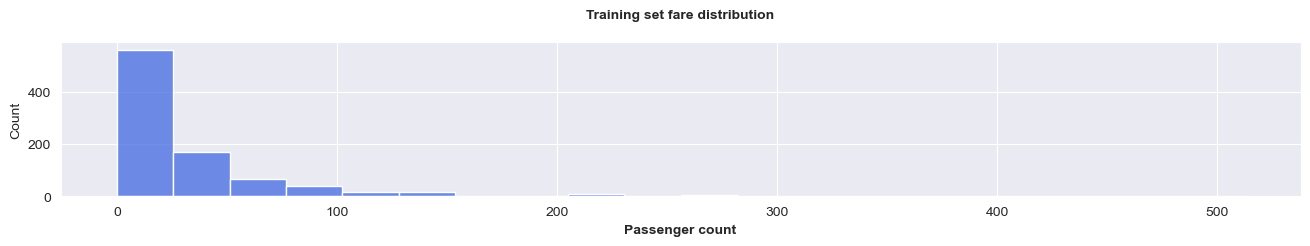

In [33]:
# Viewing training set fare distribution

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.histplot(x = train['Fare'],
                 color = 'royalblue',
                 bins = 20)

ax.set_title('Training set fare distribution', 
             fontweight = 'bold', 
             fontsize = 10, 
             y = 1.1)

ax.set_xlabel('Passenger count', 
              fontweight = 'bold')

ax = ax


In [34]:
# Viewing correlation between fare and survival

train[['Fare', 'Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


Some positive correlation was detected. This variable will be used in model building.

### 1.2.9 Embarked

In [35]:
# Checking passenger count by port of embarkation in the training data set

embarked = pd.DataFrame(train.groupby(['Embarked']).count()['PassengerId'])
embarked.columns = ['Count']
embarked['Percentage'] = embarked.apply(lambda x: round((x['Count'] / train.shape[0])*100,2), axis = 1)

embarked

,Count,Percentage
Embarked,,
C,168,18.86
Q,77,8.64
S,644,72.28


In [36]:
# Since there are a few null values, missing values will be filled with the mode

train['Embarked'] = train.Embarked.fillna('S')

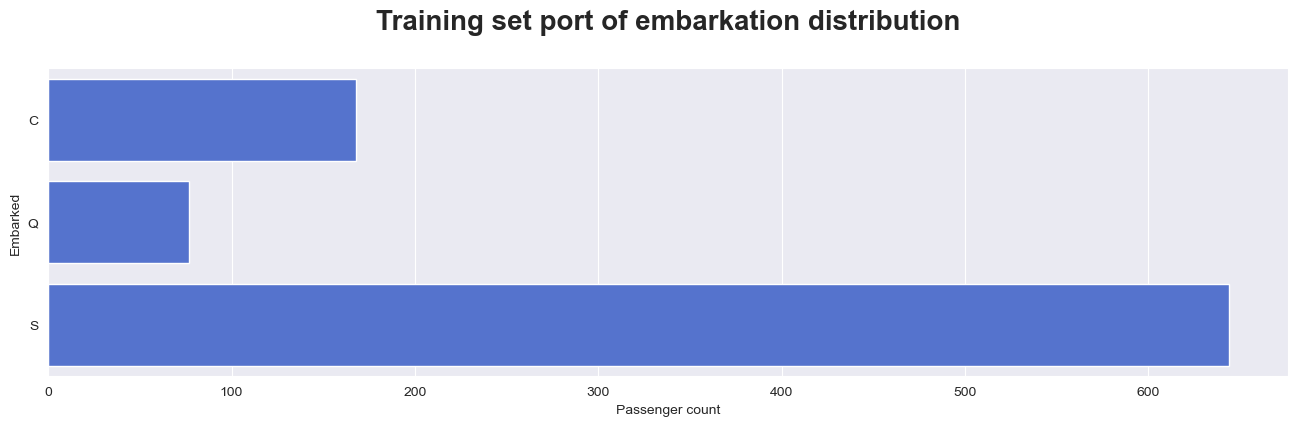

In [37]:
# Viewing training set port of embarkation distribution 

sns.set_style('darkgrid')

plt.figure(figsize=(16,4))

ax = sns.barplot(x = embarked['Count'],
                 y = embarked.index,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Training set port of embarkation distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count')

ax = ax

In [38]:
# Checking survival grouped by port of embarkation

embarked = pd.DataFrame(train[['Embarked', 'Survived']].groupby(['Embarked']).mean())
embarked

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


Passengers from port C ship have greater survival. This column will be used in model building.

# 2. Feature Engineering

As it was possible to observe in the EDA, some variables will need to be modified to better fit the model. The following columns will be feature engineered:

- Age, to create Age Bands
- Name, to create Titles
- SibSp and Parch, to check if there's family on board
- Cabin, to check if the cabin was shared with another passenger

## 2.1 Family on board

In [39]:
# Creating a family size column 

train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [40]:
# Checking the family size distribution in the training data set

train.FamilySize.describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

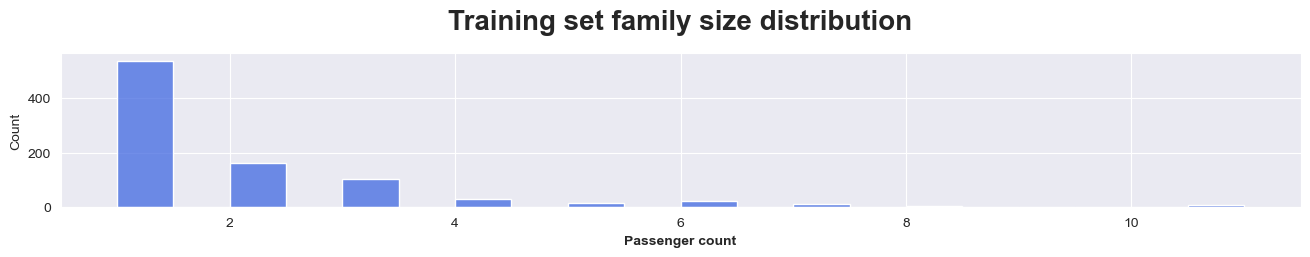

In [41]:
# Viewing training set family size distribution

sns.set_style('darkgrid')

plt.figure(figsize=(16,2))

ax = sns.histplot(x = train['FamilySize'],
                 color = 'royalblue',
                 bins = 20)

ax.set_title('Training set family size distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count', 
              fontweight = 'bold')

ax = ax


In [42]:
# Viewing correlation between family size and survival

train[['FamilySize', 'Survived']].corr()

,FamilySize,Survived
FamilySize,1.000000,0.016639
Survived,0.016639,1.000000


Still a small correlation. 

We can also create a variable to show if there's family on board, regardless of family size.

In [43]:
# Checking survival grouped by family size

train['Family'] = train['FamilySize'].apply(lambda x: 0 if x == 1 else 1)

In [44]:
# Viewing correlation between family and survival

train[['Family', 'Survived']].corr()

,Family,Survived
Family,1.000000,0.203367
Survived,0.203367,1.000000


Since it showed greater correlation, this column will be used in model building.

## 2.2 Age Bands

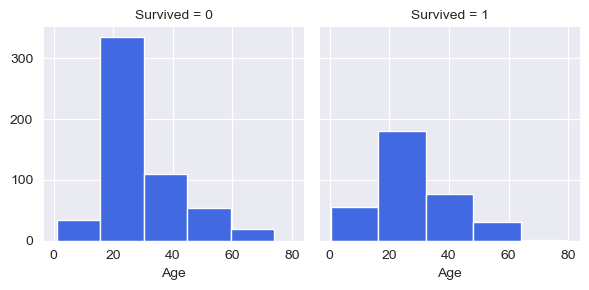

In [45]:
# Viewing age distribution by survival 

sns.set_style('darkgrid')

ax = sns.FacetGrid(train, col='Survived')

ax.map(plt.hist, 'Age', color = 'royalblue', bins = 5)

ax = ax 

In [46]:
# Creating age bands

train['AgeBand'] = pd.cut(train['Age'], 5)

train['AgeBand'].value_counts()

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeBand, dtype: int64

In [47]:
# Checking survival grouped by age band

ageband = pd.DataFrame(train[['AgeBand', 'Survived']].groupby(['AgeBand']).mean())
ageband

,Survived
AgeBand,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


Passengers under 17 years old showed greater chance to survive. 

The age band column will be used in model building.

## 2.3 Titles

In [48]:
# Creating the title column

train['Title'] = train.apply(lambda x: re.findall(r'(,\s.*?)\.', x['Name'])[0][1:], axis = 1)

In [49]:
# Checking passenger count by title in the training data set

title = pd.DataFrame(train.groupby(['Title']).count()['PassengerId'])
title.columns = ['Count']
title['Percentage'] = title.apply(lambda x: round((x['Count'] / train.shape[0])*100,2), axis = 1)

title = title.sort_values('Count', ascending = False)

title

,Count,Percentage
Title,,
Mr,517,58.02
Miss,182,20.43
Mrs,125,14.03
Master,40,4.49
Dr,7,0.79
Rev,6,0.67
Major,2,0.22
Col,2,0.22
Mlle,2,0.22


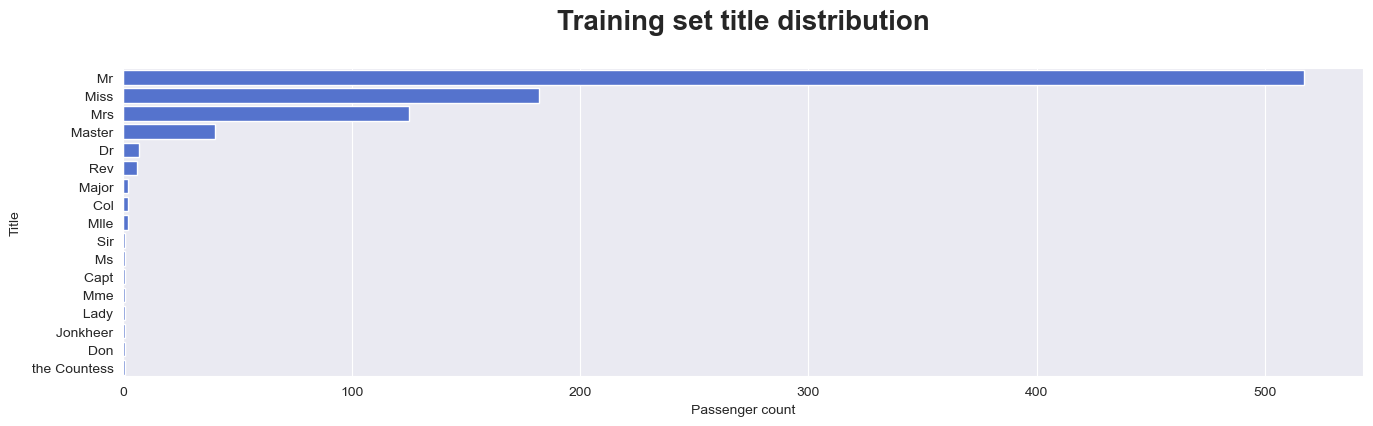

In [50]:
# Viewing training set title distribution 

sns.set_style('darkgrid')

plt.figure(figsize=(16,4))

ax = sns.barplot(x = title['Count'],
                 y = title.index,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Training set title distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count')

ax = ax

Seems like the titles Mr., Miss., Mrs., and Master. are the ones more relevant, then they'll be included in model building. 

The other ones will be grouped under the label "Others".

In [51]:
# Grouping other titles under the label "Others"

train['Title'].replace(to_replace = ['Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Sir', 'Ms', 'Capt', 'Mme', 'Lady', 'Jonkheer', 'Don', 'the Countess'], 
                       value = 'Others', 
                       inplace = True, 
                       regex = True)

In [52]:
# Checking survival grouped by title

title = pd.DataFrame(train[['Title', 'Survived']].groupby(['Title']).mean())
title.sort_values('Survived', ascending = False)

,Survived
Title,
Mrs,0.792000
Miss,0.697802
Master,0.575000
Others,0.444444
Mr,0.156673


The titles 'Mrs.' and 'Miss.' showed greater correlation with survival. All titles except "Others" will be included in model building.

### 2.4 Cabin Sharing

In [53]:
# Creating a 'CabinShared' column
# Since there are a lot of null values, missing values will be considered as a shared cabin

train['CabinShared'] = train.Cabin.fillna('shared')
train['CabinShared'] = train.Cabin.duplicated()
train['CabinShared'] = train['CabinShared'].apply(lambda x: 1 if x == True else 0)

In [54]:
# Checking shared cabins count in the training data set

cabinshared = pd.DataFrame(train.groupby(['CabinShared']).count()['PassengerId'])
cabinshared.columns = ['Count']
cabinshared['Percentage'] = cabinshared.apply(lambda x: round((x['Count'] / train.shape[0])*100,2), axis = 1)

cabinshared

,Count,Percentage
CabinShared,,
0,148,16.61
1,743,83.39


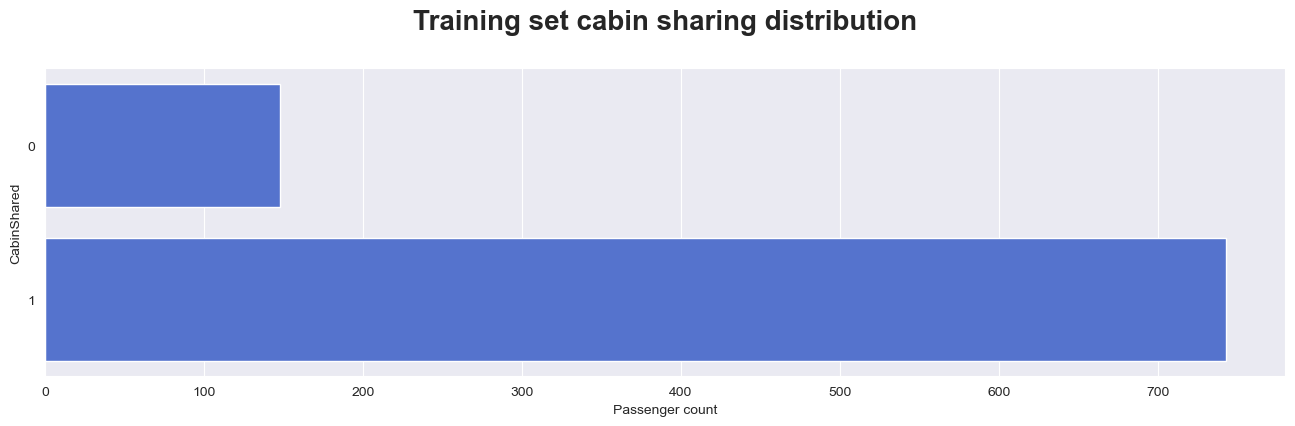

In [55]:
# Viewing training cabin sharing distribution 

sns.set_style('darkgrid')

plt.figure(figsize=(16,4))

ax = sns.barplot(x = cabinshared['Count'],
                 y = cabinshared.index,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Training set cabin sharing distribution', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax.set_xlabel('Passenger count')

ax = ax

In [56]:
# Checking survival grouped by cabin sharing

title = pd.DataFrame(train[['CabinShared', 'Survived']].groupby(['CabinShared']).mean())
title.sort_values('Survived', ascending = False)

,Survived
CabinShared,
0,0.621622
1,0.336474


Not sharing a cabin showed greater survival. This column will be added to the model.

# 3. Data Preprocessing

In this step, we'll:

- Select only the necessary columns for model building
- Split data into X and Y
- One-Hot-Encode nominal columns
- Train-test-split the data set
- Scale the X data set

In [57]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [58]:
# Selecting only the necessary columns for the model building

train = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'AgeBand', 'Title', 'CabinShared']]
train

,Survived,Pclass,Sex,Fare,Embarked,Family,AgeBand,Title,CabinShared
0,0,3,male,7.2500,S,1,"(16.336, 32.252]",Mr,0
1,1,1,female,71.2833,C,1,"(32.252, 48.168]",Mrs,0
2,1,3,female,7.9250,S,0,"(16.336, 32.252]",Miss,1
3,1,1,female,53.1000,S,1,"(32.252, 48.168]",Mrs,0
4,0,3,male,8.0500,S,0,"(32.252, 48.168]",Mr,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,S,0,"(16.336, 32.252]",Others,1
887,1,1,female,30.0000,S,0,"(16.336, 32.252]",Miss,0
888,0,3,female,23.4500,S,1,"(16.336, 32.252]",Miss,1
889,1,1,male,30.0000,C,0,"(16.336, 32.252]",Mr,0


In [59]:
# Splitting data into X and Y

X = train[['Pclass', 'Sex', 'Fare', 'Embarked', 'Family', 'AgeBand', 'Title', 'CabinShared']]
Y = train['Survived']

In [60]:
# One-Hot-Encoding nominal columns

X = pd.get_dummies(X, columns = ['Sex', 'Embarked', 'AgeBand', 'Title'])
X = X.drop(columns = ['Sex_male', 'Embarked_C', 'AgeBand_(0.34, 16.336]', 'Title_ Others'])
X

,Pclass,Fare,Family,CabinShared,Sex_female,Embarked_Q,Embarked_S,"AgeBand_(16.336, 32.252]","AgeBand_(32.252, 48.168]","AgeBand_(48.168, 64.084]","AgeBand_(64.084, 80.0]",Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs
0,3,7.2500,1,0,0,0,1,1,0,0,0,0,0,1,0
1,1,71.2833,1,0,1,0,0,0,1,0,0,0,0,0,1
2,3,7.9250,0,1,1,0,1,1,0,0,0,0,1,0,0
3,1,53.1000,1,0,1,0,1,0,1,0,0,0,0,0,1
4,3,8.0500,0,1,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,13.0000,0,1,0,0,1,1,0,0,0,0,0,0,0
887,1,30.0000,0,0,1,0,1,1,0,0,0,0,1,0,0
888,3,23.4500,1,1,1,0,1,1,0,0,0,0,1,0,0
889,1,30.0000,0,0,0,0,0,1,0,0,0,0,0,1,0


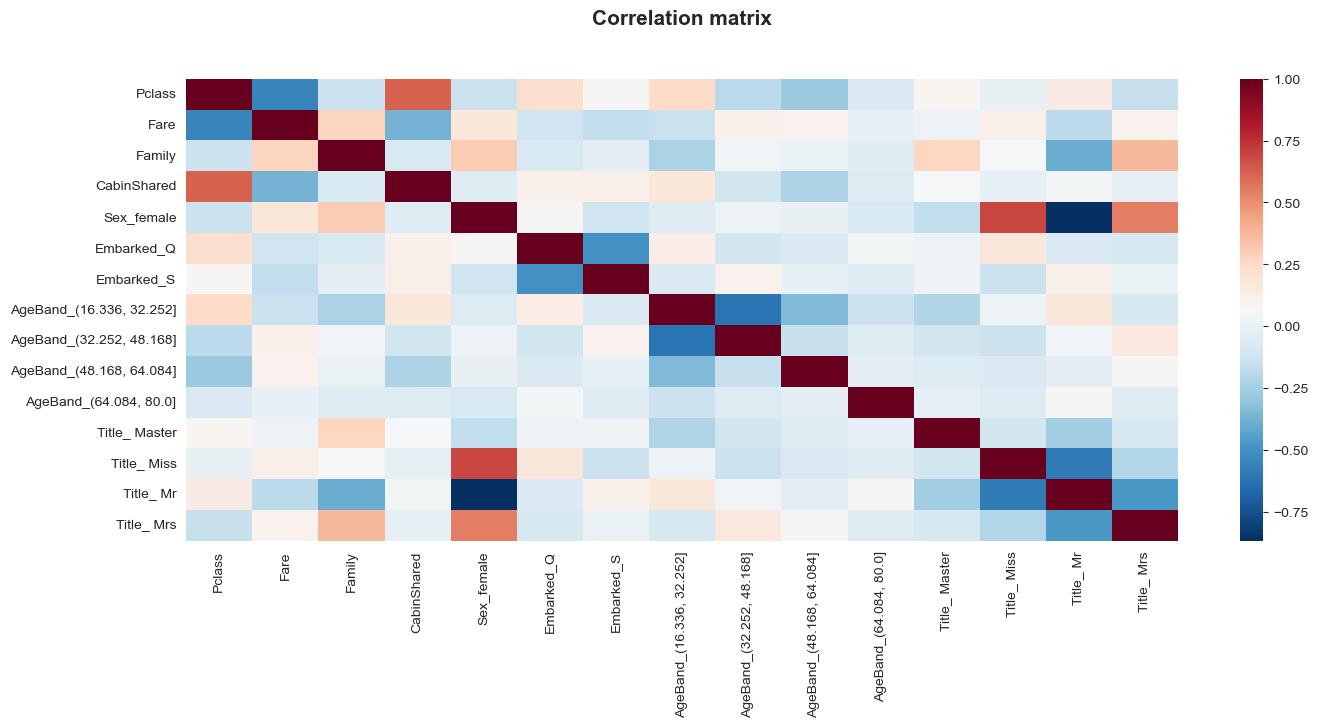

In [61]:
# Checking correlation between features

plt.figure(figsize=(16,6))

ax = sns.heatmap(X.corr(), 
                 cmap='RdBu_r',
                 square = False)

ax.set_title('Correlation matrix', 
             fontweight = 'bold', 
             fontsize = 15, 
             y = 1.1)

ax = ax

In [62]:
# Train-test-splitting the data

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=123)

In [63]:
# Feature scaling x train and test

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 4. Model Building

6 types of Classification Algorithms will be tested initially, for baseline validation performance with 5 fold cross validation:

- Logistic Regression
- K — Nearest Neighbors
- Support Vector Machine
- Naive Bayes
- Decision Tree Classifier
- Random Forest

These models will be created with the default parameters, so that later it will be possible to compute the improvement with model tuning.

## 4.1 Logistic Regression 

In [64]:
# Importing libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [65]:
# Fitting the model

lr_model = LogisticRegression()

In [66]:
# Calculating the cross validation score

cv_lr = str(round(cross_val_score(lr_model, x_train, y_train, cv=5, scoring = 'accuracy').mean()*100,2)) + '%'

cv_lr

'78.82%'

## 4.2 K-Nearest Neighbors

In [67]:
# Importing libraries

from sklearn.neighbors import KNeighborsClassifier

In [68]:
# Fitting the model

knn_model = KNeighborsClassifier()

In [69]:
# Calculating the cross validation score

cv_knn = str(round(cross_val_score(knn_model, x_train, y_train, cv=5, scoring = 'accuracy').mean()*100,2)) + '%'

cv_knn

'81.54%'

## 4.3 Support Vector Machine

In [70]:
# Importing libraries

from sklearn.svm import SVC

In [71]:
# Fitting the model

svm_model = SVC()

In [72]:
# Calculating the cross validation score

cv_svm = str(round(cross_val_score(svm_model, x_train, y_train, cv=5, scoring = 'accuracy').mean()*100,2)) + '%'

cv_svm

'81.06%'

## 4.4 Naive Bayes

In [73]:
# Importing libraries

from sklearn.naive_bayes import GaussianNB

In [74]:
# Fitting the model

nb_model = GaussianNB()

In [75]:
# Calculating the cross validation score

cv_nb = str(round(cross_val_score(nb_model, x_train, y_train, cv=5, scoring = 'accuracy').mean()*100,2)) + '%'

cv_nb

'70.27%'

## 4.5 Decision Tree Classifier

In [76]:
# Importing libraries

from sklearn.tree import DecisionTreeClassifier

In [77]:
# Fitting the model

dt_model = DecisionTreeClassifier()

In [78]:
# Calculating the cross validation score

cv_dt = str(round(cross_val_score(dt_model, x_train, y_train, cv=5, scoring = 'accuracy').mean()*100,2)) + '%'

cv_dt

'78.18%'

## 4.6 Random Forest

In [79]:
# Importing libraries

from sklearn.ensemble import RandomForestClassifier

In [80]:
# Fitting the model

rf_model = RandomForestClassifier()

In [81]:
# Calculating the cross validation score

cv_rf = str(round(cross_val_score(rf_model, x_train, y_train, cv=5, scoring = 'accuracy').mean()*100,2)) + '%'

cv_rf

'78.81%'

## 4.7 Baseline validation performance

In [82]:
pd.DataFrame(columns = ['Baseline Model Accuracy'],
            data = {'Baseline Model Accuracy': [cv_lr, 
                                                cv_knn, 
                                                cv_svm, 
                                                cv_nb, 
                                                cv_dt, 
                                                cv_rf]},
            index = ['Logistic Regression', 
                     'K-Nearest Neighbors', 
                     'Support Vector Machine', 
                     'Naive Bayes', 
                     'Decision Tree', 
                     'Random Forest'])

,Baseline Model Accuracy
Logistic Regression,78.82%
K-Nearest Neighbors,81.54%
Support Vector Machine,81.06%
Naive Bayes,70.27%
Decision Tree,78.18%
Random Forest,78.81%


KNN model accuracy score was the highest among models evaluated so far.

# 5. Model Tuning

Model tuning with GridSearchCV for finding the optimal hyperparameters to increase the models performance.

## 5.1 Logistic Regression

In [83]:
# Importing libraries

from sklearn.model_selection import GridSearchCV
import numpy as np

In [84]:
# Setting param grid

param_grid = {'max_iter' : [2000],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}

In [85]:
# Creating and fitting GridSearchCV

lr_gscv = GridSearchCV(lr_model, param_grid = param_grid, cv = 5)
best_lr = lr_gscv.fit(x_train, y_train)

In [86]:
# Returning accuracy score
gscv_lr = str(round(best_lr.best_score_*100,2)) + '%'
gscv_lr

'79.78%'

## 5.2 K-Nearest Neighbors

In [87]:
# Setting param grid

param_grid = {'n_neighbors' : [2, 5, 7, 10, 15],
              'weights' : ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [88]:
# Creating and fitting GridSearchCV

knn_gscv = GridSearchCV(knn_model, param_grid = param_grid, cv = 5)
best_knn = knn_gscv.fit(x_train, y_train)

In [89]:
# Returning accuracy score
gscv_knn = str(round(best_knn.best_score_*100,2)) + '%'
gscv_knn

'81.71%'

## 5.3 Support Vector Machine

In [90]:
# Setting param grid

param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', ],
              'degree' : [1, 2, 3, 4, 5]}

In [91]:
# Creating and fitting GridSearchCV

svm_gscv = GridSearchCV(svm_model, param_grid = param_grid, cv = 5)
best_svm = svm_gscv.fit(x_train, y_train)

In [92]:
# Returning accuracy score
gscv_svm = str(round(best_svm.best_score_*100,2)) + '%'
gscv_svm

'81.06%'

## 5.4 Naive Bayes

In [93]:
# Setting param grid

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [94]:
# Creating and fitting GridSearchCV

nb_gscv = GridSearchCV(nb_model, param_grid = param_grid, cv = 5)
best_nb = nb_gscv.fit(x_train, y_train)

In [95]:
# Returning accuracy score
gscv_nb = str(round(best_nb.best_score_*100,2)) + '%'
gscv_nb

'78.82%'

## 5.5 Decision Tree Classifier

In [96]:
# Setting param grid

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2, 4, 6, 8, 10, 12],
              'max_features': ['auto', 'sqrt', 'log2']}

In [97]:
# Creating and fitting GridSearchCV

dt_gscv = GridSearchCV(dt_model, param_grid = param_grid, cv = 5)
best_dt = dt_gscv.fit(x_train, y_train)

In [98]:
# Returning accuracy score
gscv_dt = str(round(best_dt.best_score_*100,2)) + '%'
gscv_dt

'81.22%'

## 5.6 Random Forest

In [99]:
# Setting param grid

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 4, 6, 8, 10, 12],
              'max_features': ['auto', 'sqrt', 'log2']}

In [100]:
# Creating and fitting GridSearchCV

rf_gscv = GridSearchCV(rf_model, param_grid = param_grid, cv = 5)
best_rf = rf_gscv.fit(x_train, y_train)

In [101]:
# Returning accuracy score
gscv_rf = str(round(best_rf.best_score_*100,2)) + '%'
gscv_rf

'82.99%'

## 5.7 Model tuned performance

In [102]:
pd.DataFrame(columns = ['Baseline Model Accuracy', 
                        'Model Tuned Accuracy'],
            data = {'Baseline Model Accuracy': [cv_lr, 
                                                cv_knn, 
                                                cv_svm, 
                                                cv_nb, 
                                                cv_dt, 
                                                cv_rf],
                    'Model Tuned Accuracy': [gscv_lr, 
                                             gscv_knn, 
                                             gscv_svm, 
                                             gscv_nb, 
                                             gscv_dt, 
                                             cv_rf]},
            index = ['Logistic Regression', 
                     'K-Nearest Neighbors', 
                     'Support Vector Machine', 
                     'Naive Bayes', 
                     'Decision Tree', 
                     'Random Forest'])

,Baseline Model Accuracy,Model Tuned Accuracy
Logistic Regression,78.82%,79.78%
K-Nearest Neighbors,81.54%,81.71%
Support Vector Machine,81.06%,81.06%
Naive Bayes,70.27%,78.82%
Decision Tree,78.18%,81.22%
Random Forest,78.81%,78.81%


After model tuning, all models demonstrated improved results, except for the SVM model which maintained its original accuracy.

# 6. Model Evaluation

Since a better validation performance does not necessarily imply a better performance in predicting the test data set, in this step a final model evaluation will be performed with the test data set, using the tuned models.

In [103]:
pd.DataFrame(columns = ['Model Accuracy for the testing set'],
            data = {'Model Accuracy for the testing set': [str(round(best_lr.score(x_test, y_test)*100,2)) + '%', 
                                                           str(round(best_knn.score(x_test, y_test)*100,2)) + '%',
                                                           str(round(best_svm.score(x_test, y_test)*100,2)) + '%',
                                                           str(round(best_nb.score(x_test, y_test)*100,2)) + '%',
                                                           str(round(best_dt.score(x_test, y_test)*100,2)) + '%', 
                                                           str(round(best_rf.score(x_test, y_test)*100,2)) + '%']},
            index = ['Logistic Regression', 
                     'K-Nearest Neighbors', 
                     'Support Vector Machine', 
                     'Naive Bayes', 
                     'Decision Tree', 
                     'Random Forest'])


,Model Accuracy for the testing set
Logistic Regression,80.6%
K-Nearest Neighbors,82.09%
Support Vector Machine,83.21%
Naive Bayes,79.85%
Decision Tree,80.22%
Random Forest,83.58%


**Random Forest** model accuracy score was the highest among models for the testing set.

# 7. Model Results

In [104]:
# Importing libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


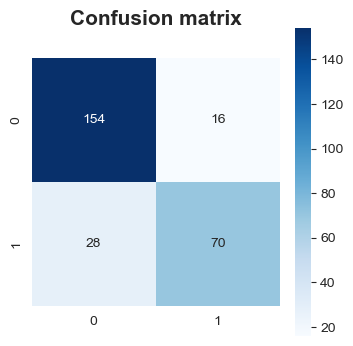

In [105]:
# Viewing confusion matrix

y_pred = best_rf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))

ax = sns.heatmap(cf_matrix, 
                 cmap='Blues',
                 square = True,
                 annot = True,
                 fmt='g')

ax.set_title('Confusion matrix', 
             fontweight = 'bold', 
             fontsize = 15, 
             y = 1.1)

ax = ax

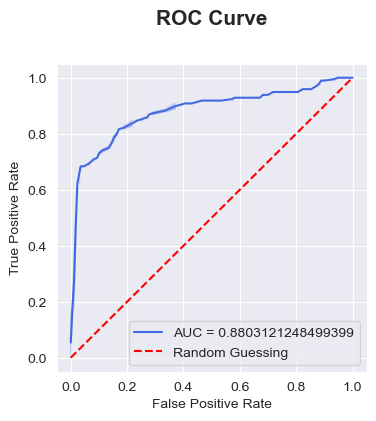

In [106]:
# Viewing ROC curve

y_prob = best_rf.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4,4))

ax = sns.lineplot(x = fpr,
                  y = tpr,
                 color = 'royalblue',
                 label = 'AUC = ' + str(roc_auc))

ax = sns.lineplot(x = [0, 1],
                  y = [0, 1],
                  linestyle='--',
                  color = 'red',
                  label = 'Random Guessing')

ax.set_title('ROC Curve', 
             fontweight = 'bold', 
             fontsize = 15, 
             y = 1.1)

ax.set_xlabel('False Positive Rate')

ax.set_ylabel('True Positive Rate')

ax = ax

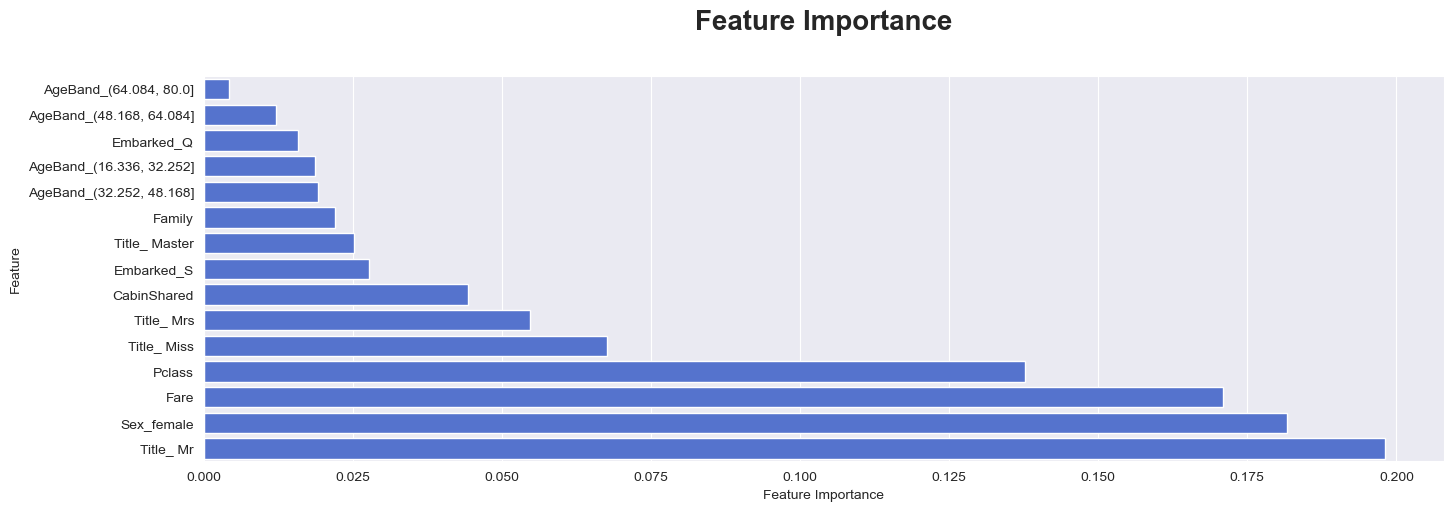

In [107]:
# Viewing Feature Importance

feat_importance = pd.DataFrame(columns = ['Feature', 'Feature Importance'],
                               data = {'Feature': X.columns,
                                       'Feature Importance': best_rf.best_estimator_.feature_importances_}).sort_values('Feature Importance', ascending = True)

sns.set_style('darkgrid')

plt.figure(figsize=(16,5))

ax = sns.barplot(x = 'Feature Importance',
                 y = 'Feature',
                 data = feat_importance,
                 color = 'royalblue',
                 orient = 'h')

ax.set_title('Feature Importance', 
             fontweight = 'bold', 
             fontsize = 20, 
             y = 1.1)

ax = ax